In [14]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
torch.__version__ # Check torch version

'2.2.2'

In [2]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cpu


# Data

upload the data

In [11]:
df = pd.read_csv('data.csv')
X = torch.tensor(df['x'].tolist(), dtype=torch.float32).unsqueeze(1)
y = torch.tensor(df['y'].tolist(), dtype=torch.float32).unsqueeze(1)
# y = weight * Sin(X) + bias
weight = 0.7
bias = 0.1

breaking down the data into train and test 

In [12]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train)

(800, 800)

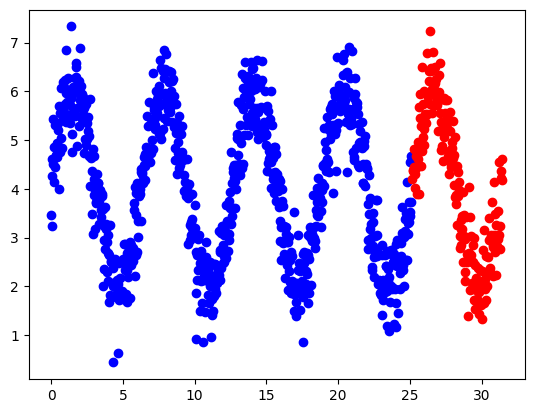

In [ ]:
plt.scatter(X_train, y_train, color='blue') # training data set
plt.scatter(X_test, y_test, color='red')    # testing data set
plt.show()

# Create your custom model. 

Basically, you have to create a class inherited from nn.Module. There are a couple of things you must consider:
1- define weight and bias as nn.Parameter
2- define 'forward' function

In [ ]:
class MyCustomModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1,                  # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                                requires_grad=True) # <- can we update this value with gradient descent? if True, it means yes

        self.bias = nn.Parameter(torch.randn(1,                     # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float),     # <- PyTorch loves float32 by default
                                            requires_grad=True)     # <- can we update this value with gradient descent? If True, it means yes
    
    # Forward defines the computation in the model. In this case, it's sin function
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * np.sin(x) + self.bias

# Train the model

In [17]:
torch.manual_seed(42) # static seed to provide reproducability
model = MyCustomModel()
model.to(device) # Send to the target processor which is either CPU or GPU
loss_fn = nn.L1Loss() # Loss function
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01) # optimizer as well as the step for learning

### Training loop 

In [23]:
epochs = 200
for epoch in range(epochs):
    model.train()
    y_pred = model(X_train) # Forward pass
    
    loss = loss_fn(y_pred, y_train) # calculate loss

    optimizer.zero_grad() # optimizer

    loss.backward() # perform backpropagation

    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")



Epoch: 0 | Loss: 0.3871232569217682 | Test loss: 0.3941730260848999
Epoch: 10 | Loss: 0.3871042728424072 | Test loss: 0.3940974175930023
Epoch: 20 | Loss: 0.3870861828327179 | Test loss: 0.39402496814727783
Epoch: 30 | Loss: 0.3870680630207062 | Test loss: 0.39395248889923096
Epoch: 40 | Loss: 0.38705581426620483 | Test loss: 0.3939047157764435
Epoch: 50 | Loss: 0.3870478868484497 | Test loss: 0.3938605487346649
Epoch: 60 | Loss: 0.3870401382446289 | Test loss: 0.39381226897239685
Epoch: 70 | Loss: 0.38703247904777527 | Test loss: 0.3937625586986542
Epoch: 80 | Loss: 0.38702476024627686 | Test loss: 0.39371439814567566
Epoch: 90 | Loss: 0.38701707124710083 | Test loss: 0.39367228746414185
Epoch: 100 | Loss: 0.3870094418525696 | Test loss: 0.3936353027820587
Epoch: 110 | Loss: 0.3870033323764801 | Test loss: 0.3936076760292053
Epoch: 120 | Loss: 0.38700035214424133 | Test loss: 0.39358770847320557
Epoch: 130 | Loss: 0.3869973421096802 | Test loss: 0.39356642961502075
Epoch: 140 | Loss: 

In [ ]:
model.state_dict()  # to check the weight and bias,

OrderedDict([('weights', tensor([1.9892])), ('bias', tensor([4.0137]))])

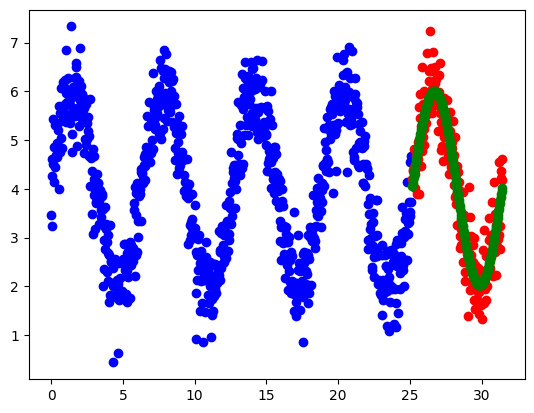

In [28]:
with torch.inference_mode():
    y_preds = model(X_test)
plt.scatter(X_train, y_train, color='blue') # training data set
plt.scatter(X_test, y_test, color='red')    # testing data set
plt.scatter(X_test, y_preds, color='green')    # predicting data set
plt.show()